# Part 1: Data Exploration

## Part 1.1: Understand the Raw Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
credit_risk = 'https://raw.githubusercontent.com/tracysnowf/Deloitte-CapstoneProject/main/data/Mortgage%20Lending_raw.csv'
df_cr = pd.read_csv(credit_risk, sep = ',')

In [3]:
df_cr.head() # column 0 is redundant

,Unnamed: 0,derived_ethnicity,derived_race,derived_sex,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_only_payment,balloon_payment,income,debt_to_income_ratio,applicant_age
0,0,Not Hispanic or Latino,Black or African American,Female,1,2,1,32,105000.0,75.0,2,2,91.0,48,35-44
1,1,Not Hispanic or Latino,Black or African American,Female,3,2,1,31,275000.0,52.38,2,2,142.0,44,>74
2,2,Hispanic or Latino,White,Male,3,2,1,1,235000.0,80.0,2,2,60.0,38,35-44
3,3,Not Hispanic or Latino,White,Male,1,2,1,1,465000.0,94.69,2,2,112.0,42,35-44
4,4,Not Hispanic or Latino,Black or African American,Male,1,1,3,1,415000.0,100.0,2,2,83.0,50%-60%,25-34


In [4]:
# check data info
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14509 entries, 0 to 14508
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14509 non-null  int64  
 1   derived_ethnicity      14509 non-null  object 
 2   derived_race           14509 non-null  object 
 3   derived_sex            14509 non-null  object 
 4   action_taken           14509 non-null  int64  
 5   preapproval            14509 non-null  int64  
 6   loan_type              14509 non-null  int64  
 7   loan_purpose           14509 non-null  int64  
 8   loan_amount            14509 non-null  float64
 9   loan_to_value_ratio    13902 non-null  object 
 10  interest_only_payment  14509 non-null  int64  
 11  balloon_payment        14509 non-null  int64  
 12  income                 14027 non-null  float64
 13  debt_to_income_ratio   13787 non-null  object 
 14  applicant_age          14509 non-null  object 
dtypes:

In [5]:
# check the unique values for each column
df_cr.nunique()

Unnamed: 0               14509
derived_ethnicity            5
derived_race                 9
derived_sex                  2
action_taken                 2
preapproval                  2
loan_type                    4
loan_purpose                 6
loan_amount                237
loan_to_value_ratio       7074
interest_only_payment        3
balloon_payment              3
income                     778
debt_to_income_ratio        20
applicant_age                8
dtype: int64

In [6]:
df_cr = df_cr.drop('Unnamed: 0', 1) # delete index column from csv

##### action_taken - Y variable
1 -- Loan originated (the qualification and verification process that begins a new loan.) <br>
2 -- Application approved but not accepted (If the loan was approved before closing but the applicant either failed to respond or the loan was not otherwise closed, then the action taken would be reported as approved but not accepted.) <br>
3 -- Application denied by financial institution <br>

Comments: <br>
category 1 (a typo) might actually be 2(Approved) in the codebook, and 3 stays the same(Disapproved)

In [7]:
pd.unique(df_cr['action_taken'])

array([1, 3], dtype=int64)

In [8]:
# new codebook: 1 - Approved; 0 - Disapproved
# so change all the vlaues of 3 to 0
df_cr['action_taken'].mask((df_cr['action_taken'] == 3), 0, inplace=True)

In [9]:
# check the distribution of target variable action_taken
df_cr.loc[:,'action_taken'].value_counts()

1    10871
0     3638
Name: action_taken, dtype: int64

## Part 1.2: Understand the Features

In [10]:
# understand overall features
df_cr.describe()
# Action Taken:
# 1 -- Loan originated
# 2 -- Application approved but not accepted
# 3 -- Application denied by financial institution

# Preapproval:
# 1 -- Preapproval was requested
# 2 -- Preapproval was not requested

# Loan Type: **75% IQR = 1
# 1 -- Conventional (any loan other than FHA, VA, FSA, or RHS loans)
# 2 -- FHA-insured (Federal Housing Administration)
# 3 -- VA-guaranteed (Veterans Administration)
# 4 -- FSA/RHS (Farm Service Agency or Rural Housing Service)

# Loan Purpose: **error data,
# 1 -- Home purchase
# 2 -- Home improvement
# 3 -- Refinancing

# Loan Amount: in thousands of dollars

# interest_only_payment **not in the codebook, 1111？

# balloon_payment **not in the codebook, 1111？

# income: Gross Annual Income: in thousands of dollars **negative/ error data

,action_taken,preapproval,loan_type,loan_purpose,loan_amount,interest_only_payment,balloon_payment,income
count,14509.000000,14509.000000,14509.000000,14509.000000,1.450900e+04,14509.000000,14509.000000,14027.000000
mean,0.749259,1.978979,1.147081,14.755669,3.924981e+05,14.098973,14.135295,160.826335
std,0.433455,0.143461,0.459418,14.860877,3.340678e+05,115.466461,115.462492,297.351109
min,0.000000,1.000000,1.000000,1.000000,5.000000e+03,1.000000,1.000000,-123.000000
25%,0.000000,2.000000,1.000000,1.000000,1.950000e+05,2.000000,2.000000,79.000000
50%,1.000000,2.000000,1.000000,4.000000,3.450000e+05,2.000000,2.000000,116.000000
75%,1.000000,2.000000,1.000000,31.000000,5.050000e+05,2.000000,2.000000,170.000000
max,1.000000,2.000000,4.000000,32.000000,7.505000e+06,1111.000000,1111.000000,20000.000000


### Numerical Features Data Cleaning 

In [11]:
# understand numerical features
# loan_amount look normal, need to clean column loan_to_value_ratio, income
df_cr[["loan_amount", "loan_to_value_ratio", "income"]].describe()

,loan_amount,income
count,1.450900e+04,14027.000000
mean,3.924981e+05,160.826335
std,3.340678e+05,297.351109
min,5.000000e+03,-123.000000
25%,1.950000e+05,79.000000
50%,3.450000e+05,116.000000
75%,5.050000e+05,170.000000
max,7.505000e+06,20000.000000


##### loan_to_value_ratio
Description: The ratio of the total amount of debt secured by the property to the value of the property relied on in making the credit decisiontio.

In [12]:
pd.unique(df_cr['loan_to_value_ratio'])

array(['75.0', '52.38', '80.0', ..., '68.883', '87.03', '52.45'],
      dtype=object)

In [13]:
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'str'>      13902
<class 'float'>      607
Name: loan_to_value_ratio, dtype: int64

In [14]:
# 607 null values
len(df_cr[pd.to_numeric(df_cr['loan_to_value_ratio'].isnull(),errors='coerce')])

607

In [15]:
# 159 Exempt values
len(df_cr[(df_cr['loan_to_value_ratio'] == "Exempt")])

159

In [16]:
# drop 607 null values and 159 Exempt values
df_cr = df_cr[pd.to_numeric(df_cr['loan_to_value_ratio'].notnull(),errors='coerce')]
df_cr = df_cr[(df_cr['loan_to_value_ratio'] != "Exempt")]
# reset index
df_cr = df_cr.reset_index(drop = True)
# cast string types of values to numeric type
pd.to_numeric(df_cr['loan_to_value_ratio'], errors='coerce')
# cast string types of values to numeric type
df_cr['loan_to_value_ratio'] = pd.to_numeric(df_cr['loan_to_value_ratio'], errors='coerce')

In [17]:
# check the result
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'float'>    13743
Name: loan_to_value_ratio, dtype: int64

##### log_loan_to_value_ratio (NEW column for log reg)
Description: The log of the ratio of the total amount of debt secured by the property to the value of the property relied on in making the credit decisiontio.

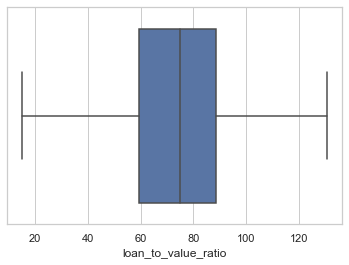

In [18]:
# boxplot shows loan_to_value_ratio (without outliers) is a little left-skewed, so perform the log transformation
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_cr["loan_to_value_ratio"], data = df_cr, showfliers = False)

In [19]:
df_cr['log_loan_to_value_ratio'] = np.log2(df_cr['loan_to_value_ratio'])

##### income

In [20]:
# 252 null values
len(df_cr[pd.to_numeric(df_cr['income'].isnull(),errors='coerce')])

252

In [21]:
# 10 negative/ error values, will keep them in the data
len(df_cr[(df_cr['income'] < 0)])

10

In [22]:
# drop 252 null values
df_cr = df_cr[pd.to_numeric(df_cr['income'].notnull(),errors='coerce')]
# reset index
df_cr = df_cr.reset_index(drop = True)

In [23]:
# check the result
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'float'>    13491
Name: loan_to_value_ratio, dtype: int64

#### Cleaned Numeric Features Summary

In [24]:
# understand numeric features
df_cr[["loan_amount", "loan_to_value_ratio", "income"]].describe()

,loan_amount,loan_to_value_ratio,income
count,1.349100e+04,13491.000000,13491.000000
mean,3.937288e+05,71.587950,162.098732
std,3.268893e+05,27.608336,295.949162
min,5.000000e+03,0.541000,-123.000000
25%,1.950000e+05,59.090000,80.000000
50%,3.450000e+05,75.000000,118.000000
75%,5.050000e+05,88.317000,172.000000
max,7.505000e+06,999.999000,20000.000000


#### Correlation of Numeric Features

In [25]:
# correlation heat map of numerical features
sns.set()

numCol = []
for col in df_cr:
  if df_cr[col].dtype == np.float64:
    numCol.append(col)
corr = df_cr[numCol].corr()

[Text(0.5, 0, 'loan_amount'),
 Text(1.5, 0, 'loan_to_value_ratio'),
 Text(2.5, 0, 'income'),
 Text(3.5, 0, 'log_loan_to_value_ratio')]

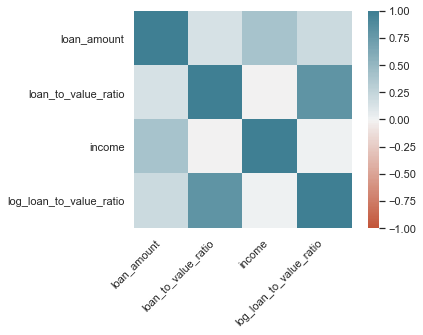

In [26]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [27]:
# check the actual values of correlations
corr_score = df_cr[numCol].corr()
corr_score
# heatmap conclusion: all good, no column needs to be dropped.
# ***but keep in mind that loan_amount and loan_to_value_ratio are not dependent - might need to drop one of them when using linear/ logistic regression

,loan_amount,loan_to_value_ratio,income,log_loan_to_value_ratio
loan_amount,1.000000,0.145522,0.400237,0.208116
loan_to_value_ratio,0.145522,1.000000,-0.003318,0.806731
income,0.400237,-0.003318,1.000000,0.013264
log_loan_to_value_ratio,0.208116,0.806731,0.013264,1.000000


### Categorical Features Data Cleaning 

##### preapproval_requested (old: preapproval)
1 -- Preapproval was requested <br>
2 -- Preapproval was not requested <br>

NEW: <br>
Preapprove Requested - Preapproval was requested <br>
No Preapprove Requested - Preapproval was not requested <br>

rename column: preapproval -> preapproval_requested

In [28]:
df_cr['preapproval'].mask((df_cr['preapproval'] == 1), "Preapproval Requested", inplace=True)
df_cr['preapproval'].mask((df_cr['preapproval'] == 2), "No Preapproval Requested", inplace=True)

In [29]:
# change column name 'preapproval' -> 'preapproval_requested'
df_cr.rename(columns={'preapproval': 'preapproval_requested'}, inplace=True)

<AxesSubplot:>

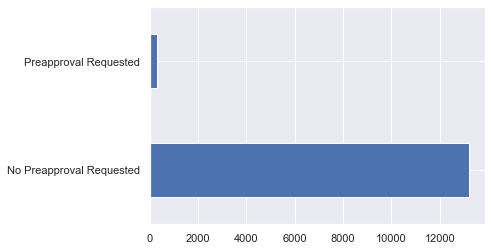

In [30]:
# explore loan_type category
df_cr["preapproval_requested"].value_counts().plot(kind='barh')

##### loan_type
1 -- Conventional (any loan other than FHA, VA, FSA, or RHS loans) <br>
2 -- FHA-insured (Federal Housing Administration) <br>
3 -- VA-guaranteed (Veterans Administration) <br>
4 -- FSA/RHS (Farm Service Agency or Rural Housing Service) <br>

Comments: <br>
75% IQR = 1 <br>
About 90% of the whole loan type is type 1 - Conventional among the 4 types. <br>
Is this data representative to the whole population? <br>
possible research directions: if people with a Conventional loan type have an obviously higher/lower chance to get approved for the loan compared to people with a NON Conventional loan type?

In [31]:
# changed 1, 2, 3, 4 to their corresponding categorical names
df_cr['loan_type'].mask((df_cr['loan_type'] == 1), 'Converntional', inplace=True)
df_cr['loan_type'].mask((df_cr['loan_type'] == 2), 'FHA-insured', inplace=True)
df_cr['loan_type'].mask((df_cr['loan_type'] == 3), 'VA-guaranteed', inplace=True)
df_cr['loan_type'].mask((df_cr['loan_type'] == 4), 'FSA/RHS', inplace=True)

In [32]:
len(df_cr[df_cr['loan_type'] == 'Converntional']) / len(df_cr['loan_type'])

0.9175746794159069

In [33]:
# number of 'FSA/RHS' is only 2, not representative, so drop this category
len(df_cr[df_cr['loan_type'] == 'FSA/RHS'])

2

In [34]:
# drop 'FSA/RHS' column
df_cr.drop(df_cr[df_cr['loan_type'] == 'FSA/RHS'].index, inplace = True)

In [35]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

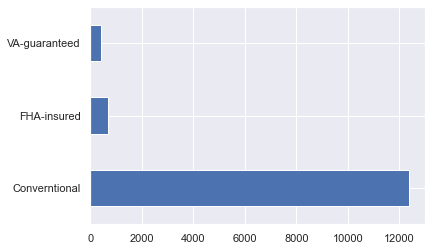

In [36]:
# explore loan_type category
df_cr["loan_type"].value_counts().plot(kind='barh')

##### loan_purpose 
Description: The purpose of covered loan or application
Values: <br>
1 - Home purchase <br>
2 - Home improvement <br>
31 - Refinancing <br>
32 - Cash-out refinancing <br>
4 - Other purpose <br>
5 - Not applicable 

CHANGE - 31, 32 -> 3 - Refinancing; dropped 19 values of "not applicable" 

In [37]:
df_cr["loan_purpose"].replace([31, 32], 3, regex=False, inplace=True)

In [38]:
# 19 values of "not applicable" 
len(df_cr[df_cr['loan_purpose'] == 5])

17

In [39]:
# 5 -> NAs
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 5), None, inplace=True)

In [40]:
# drop 19 values
df_cr = df_cr[pd.to_numeric(df_cr['loan_purpose'].notnull(),errors='coerce')]

In [41]:
# changed 1, 2, 3, 4, 5 to their corresponding categorical names
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 1), 'Home Purchase', inplace=True)
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 2), 'Home Improvement', inplace=True)
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 3), 'Refinancing', inplace=True)
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == 4), 'Other Purpose', inplace=True)

In [42]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

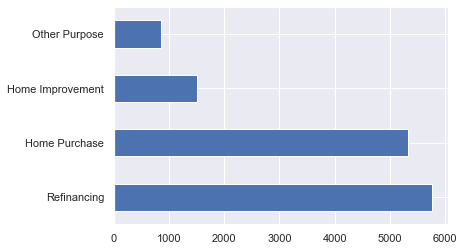

In [43]:
# explore loan_purpose category
df_cr["loan_purpose"].value_counts().plot(kind='barh')

##### is_not_hispanic (old: derived_ethnicity)

In [44]:
pd.unique(df_cr['derived_ethnicity'])

array(['Not Hispanic or Latino', 'Hispanic or Latino', 'Joint',
       'Ethnicity Not Available', 'Free Form Text Only'], dtype=object)

In [45]:
# Convert 'Joint', 'Ethnicity Not Available', 'Free Form Text Only' to NAs
df_cr['derived_ethnicity'].mask((df_cr['derived_ethnicity'] == 'Joint') |
                                (df_cr['derived_ethnicity'] == 'Ethnicity Not Available') |
                                (df_cr['derived_ethnicity'] == 'Free Form Text Only'), None, inplace=True)

In [46]:
df_cr['derived_ethnicity'].map(type).value_counts()

<class 'str'>         11743
<class 'NoneType'>     1729
Name: derived_ethnicity, dtype: int64

In [47]:
# drop 1878 null values
df_cr = df_cr[pd.to_numeric(df_cr['derived_ethnicity'].notnull(),errors='coerce')]

In [48]:
df_cr['derived_ethnicity'].map(type).value_counts()

<class 'str'>    11743
Name: derived_ethnicity, dtype: int64

In [49]:
# reset index
df_cr = df_cr.reset_index(drop = True)

In [50]:
# change column name 'derived_ethnicity' -> 'is_not_hispanic'
df_cr.rename(columns={'derived_ethnicity': 'is_not_hispanic'}, inplace=True)

<AxesSubplot:>

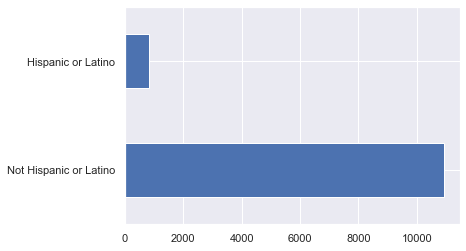

In [51]:
# explore is_not_hispanic category
df_cr["is_not_hispanic"].value_counts().plot(kind='barh')

##### derived_race

In [52]:
pd.unique(df_cr['derived_race'])

array(['Black or African American', 'White', 'Asian',
       '2 or more minority races', 'Race Not Available', 'Joint',
       'Native Hawaiian or Other Pacific Islander',
       'American Indian or Alaska Native', 'Free Form Text Only'],
      dtype=object)

In [53]:
# Convert '2 or more minority races', 'Race Not Available','American Indian or Alaska Native', 
# 'Joint', 'Native Hawaiian or Other Pacific Islander' to 'Minority Race/(s/)'
df_cr['derived_race'].mask((df_cr['derived_race'] == '2 or more minority races') |
                            (df_cr['derived_race'] == 'American Indian or Alaska Native') |
                            (df_cr['derived_race'] == 'Joint') |
                            (df_cr['derived_race'] == 'Native Hawaiian or Other Pacific Islander'), "Minority Races", inplace=True)

In [54]:
df_cr['derived_race'].mask((df_cr['derived_race'] == 'Free Form Text Only') |
                           (df_cr['derived_race'] == 'Race Not Available'), None, inplace=True)

In [55]:
df_cr['derived_race'].map(type).value_counts()

<class 'str'>         11246
<class 'NoneType'>      497
Name: derived_race, dtype: int64

In [56]:
pd.unique(df_cr['derived_race'])

array(['Black or African American', 'White', 'Asian', 'Minority Races',
       None], dtype=object)

In [57]:
# drop 526 null values
df_cr = df_cr[pd.to_numeric(df_cr['derived_race'].notnull(),errors='coerce')]

In [58]:
pd.unique(df_cr['derived_race'])

array(['Black or African American', 'White', 'Asian', 'Minority Races'],
      dtype=object)

In [59]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

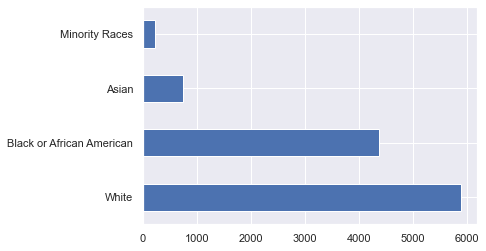

In [60]:
# explore derived_race category
df_cr["derived_race"].value_counts().plot(kind='barh')

##### is_male (old: derived_sex)

In [61]:
pd.unique(df_cr['derived_sex']) # OK

array(['Female', 'Male'], dtype=object)

In [62]:
# change column name 'derived_sex' -> 'is_male'
df_cr.rename(columns={'derived_sex': 'is_male'}, inplace=True)

<AxesSubplot:>

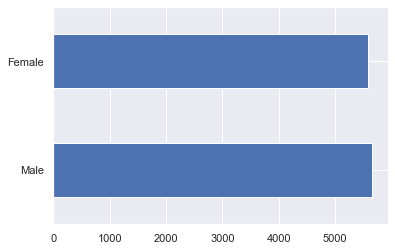

In [63]:
# explore is_male category
df_cr["is_male"].value_counts().plot(kind='barh')

##### debt_to_income_ratio 
Description: The ratio, as a percentage, of the applicant’s or borrower’s total monthly debt to the total monthly income relied on in making the credit decision

In [64]:
pd.unique(df_cr['debt_to_income_ratio']) # should create a new column: 36% - 49%, Exempt = NaN?

array(['48', '44', '38', '42', '50%-60%', '>60%', '30%-<36%', '40', '36',
       '20%-<30%', '49', '<20%', '43', '41', '47', '46', '37', '39', '45',
       nan], dtype=object)

In [65]:
df_cr["debt_to_income_ratio"].replace(['48', '44', '38', '42', '40', '36', '49', '47', '43', '41', '39', '46', '37', '45'], '36%-<50%', regex=False, inplace=True)

In [66]:
# replace "Exempt" with NAs
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == 'Exempt'), None, inplace=True)

In [67]:
# drop null values
df_cr = df_cr[pd.to_numeric(df_cr['debt_to_income_ratio'].notnull(),errors='coerce')]

In [68]:
pd.unique(df_cr['debt_to_income_ratio'])

array(['36%-<50%', '50%-60%', '>60%', '30%-<36%', '20%-<30%', '<20%'],
      dtype=object)

In [69]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

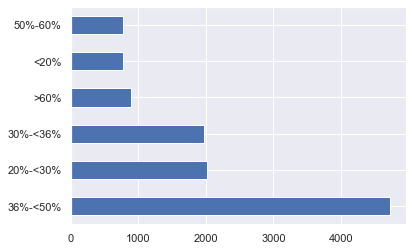

In [70]:
# explore debt_to_income_ratio category
df_cr["debt_to_income_ratio"].value_counts().plot(kind='barh')

##### mid_debt_to_income_ratio  (NEW column for log reg)
Description: Mid values (it's neither median nor average because of lack of info) of the categorical variable debt_to_income_ratio

In [71]:
conditions = [
    df_cr['debt_to_income_ratio'] == '<20%',
    df_cr['debt_to_income_ratio'] == '20%-<30%',
    df_cr['debt_to_income_ratio'] == '30%-<36%',
    df_cr['debt_to_income_ratio'] == '36%-<50%',
    df_cr['debt_to_income_ratio'] == '50%-60%',
    df_cr['debt_to_income_ratio'] == '>60%'
]

choices = [0.15, 0.25, 0.33, 0.38, 0.55, 0.65]

df_cr['mid_debt_to_income_ratio'] = np.select(conditions, choices, default=0)

<AxesSubplot:>

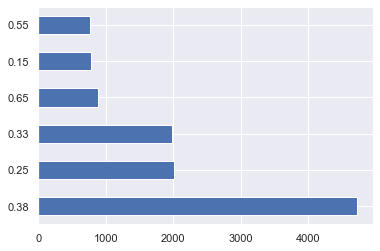

In [72]:
# explore mid_debt_to_income_ratio category
df_cr["mid_debt_to_income_ratio"].value_counts().plot(kind='barh')

##### debt  (NEW column for log reg)
Description: debt = mid_debt_to_income_ratio * income

In [73]:
df_cr['debt'] = np.multiply(df_cr['mid_debt_to_income_ratio'], df_cr['income'])

##### applicant_age

In [74]:
pd.unique(df_cr['applicant_age']) # 8888
# df_cr[(df_cr['applicant_age'] == '8888')] # print 4 rows with age = 8888

array(['35-44', '>74', '25-34', '55-64', '45-54', '65-74', '<25', '8888'],
      dtype=object)

In [75]:
# drop rows with 8888
df_cr.drop(df_cr.index[df_cr['applicant_age'] == '8888'], inplace=True)

In [76]:
pd.unique(df_cr['applicant_age'])

array(['35-44', '>74', '25-34', '55-64', '45-54', '65-74', '<25'],
      dtype=object)

In [77]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

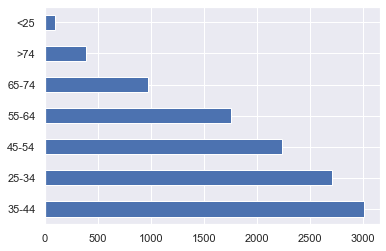

In [78]:
# explore applicant_age category
df_cr["applicant_age"].value_counts().plot(kind='barh')

In [79]:
# cleaned dataset info
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11148 entries, 0 to 11147
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   is_not_hispanic           11148 non-null  object 
 1   derived_race              11148 non-null  object 
 2   is_male                   11148 non-null  object 
 3   action_taken              11148 non-null  int64  
 4   preapproval_requested     11148 non-null  object 
 5   loan_type                 11148 non-null  object 
 6   loan_purpose              11148 non-null  object 
 7   loan_amount               11148 non-null  float64
 8   loan_to_value_ratio       11148 non-null  float64
 9   interest_only_payment     11148 non-null  int64  
 10  balloon_payment           11148 non-null  int64  
 11  income                    11148 non-null  float64
 12  debt_to_income_ratio      11148 non-null  object 
 13  applicant_age             11148 non-null  object 
 14  log_lo

In [80]:
df_cr

,is_not_hispanic,derived_race,is_male,action_taken,preapproval_requested,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_only_payment,balloon_payment,income,debt_to_income_ratio,applicant_age,log_loan_to_value_ratio,mid_debt_to_income_ratio,debt
0,Not Hispanic or Latino,Black or African American,Female,1,No Preapproval Requested,Converntional,Refinancing,105000.0,75.00,2,2,91.0,36%-<50%,35-44,6.228819,0.38,34.58
1,Not Hispanic or Latino,Black or African American,Female,0,No Preapproval Requested,Converntional,Refinancing,275000.0,52.38,2,2,142.0,36%-<50%,>74,5.710944,0.38,53.96
2,Hispanic or Latino,White,Male,0,No Preapproval Requested,Converntional,Home Purchase,235000.0,80.00,2,2,60.0,36%-<50%,35-44,6.321928,0.38,22.80
3,Not Hispanic or Latino,White,Male,1,No Preapproval Requested,Converntional,Home Purchase,465000.0,94.69,2,2,112.0,36%-<50%,35-44,6.565140,0.38,42.56
4,Not Hispanic or Latino,Black or African American,Male,1,Preapproval Requested,VA-guaranteed,Home Purchase,415000.0,100.00,2,2,83.0,50%-60%,25-34,6.643856,0.55,45.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,Hispanic or Latino,White,Male,0,No Preapproval Requested,Converntional,Refinancing,225000.0,75.00,2,2,76.0,>60%,55-64,6.228819,0.65,49.40
11144,Not Hispanic or Latino,Black or African American,Male,1,No Preapproval Requested,Converntional,Home Purchase,345000.0,80.00,2,2,168.0,36%-<50%,25-34,6.321928,0.38,63.84
11145,Not Hispanic or Latino,Black or African American,Male,0,No Preapproval Requested,Converntional,Refinancing,385000.0,75.00,2,2,160.0,36%-<50%,25-34,6.228819,0.38,60.80
11146,Not Hispanic or Latino,White,Male,1,No Preapproval Requested,Converntional,Refinancing,655000.0,77.00,2,2,150.0,36%-<50%,55-64,6.266787,0.38,57.00


#### Understand Numerical Feature Distribution
##### loan_amount, loan_to_value_ratio, income

<AxesSubplot:xlabel='action_taken', ylabel='income'>

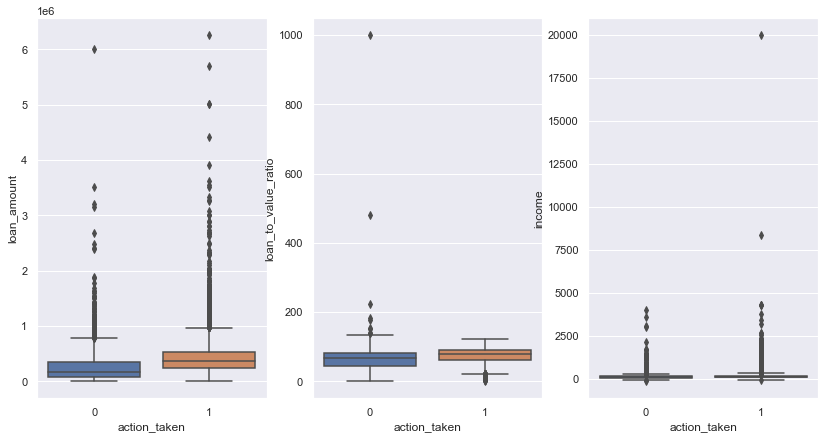

In [81]:
_,axs = plt.subplots(1,3, figsize=[14,7])
_.title = "title"
sns.boxplot(x='action_taken', y='loan_amount', data=df_cr, ax=axs[0])
sns.boxplot(x='action_taken', y='loan_to_value_ratio', data=df_cr, ax=axs[1])
sns.boxplot(x='action_taken', y='income', data=df_cr, ax=axs[2])

#### Understand Categorical Feature Distribution
##### derived_ethnicity, derived_race, interest_only_payment, balloon_payment, derived_sex, preapproval, loan_type,  loan_purpose

<AxesSubplot:xlabel='action_taken', ylabel='count'>

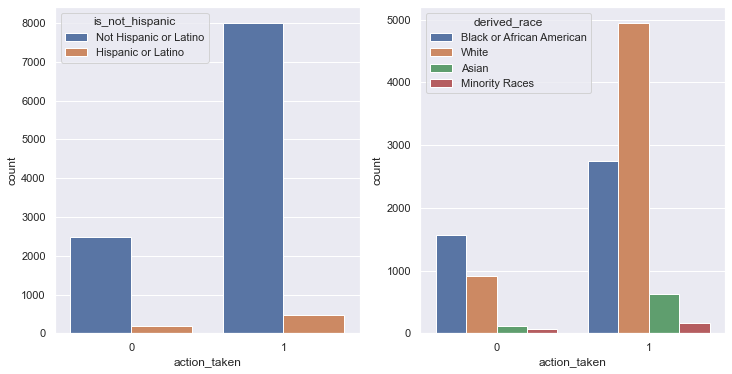

In [82]:
 _,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='is_not_hispanic', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='derived_race', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

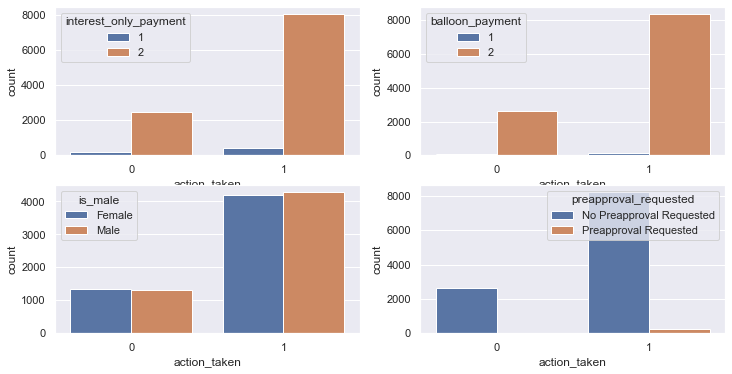

In [83]:
_,axss = plt.subplots(2,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='interest_only_payment', data=df_cr, ax=axss[0][0])
sns.countplot(x='action_taken', hue='balloon_payment', data=df_cr, ax=axss[0][1])
sns.countplot(x='action_taken', hue='is_male', data=df_cr, ax=axss[1][0])
sns.countplot(x='action_taken', hue='preapproval_requested', data=df_cr, ax=axss[1][1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

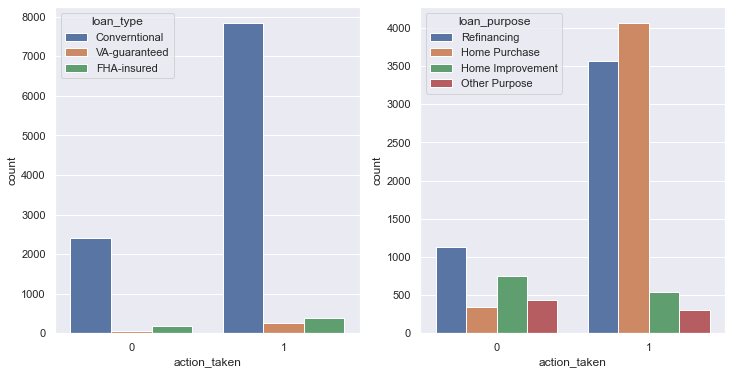

In [84]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='loan_type', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='loan_purpose', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

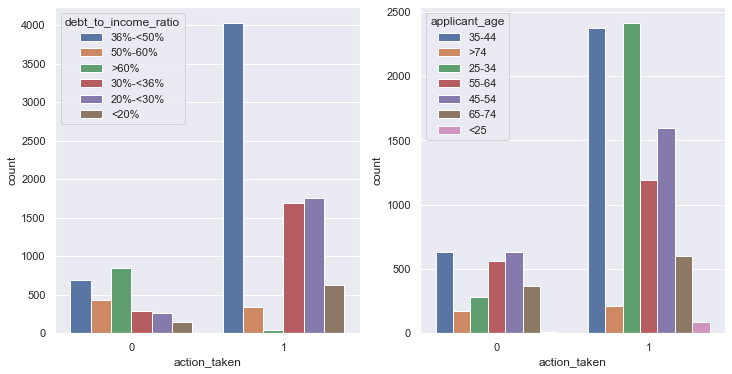

In [85]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='debt_to_income_ratio', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='applicant_age', data=df_cr, ax=axss[1])

In [86]:
# df_cr.to_csv('data/Clean_Mortgage_Lending.csv')

# Part 2: Feature Preprocessing

In [87]:
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

### Split Data

In [88]:
to_drop = ['action_taken']
X = df_cr.drop(to_drop, axis = 1)
# target variable
y = df_cr['action_taken']

In [89]:
# Splite data into training and testing
# 100 -> 75:y=1, 25:y=0
# training(80): 60 y=1; 20 y=0 
# testing(20):  15 y=1; 5 y=0

# Reserve 25% for testing
# stratify example:
# 100 -> y: 80 '0', 20 '1' -> 4:1
# 80% training 64: '0', 16:'1' -> 4:1
# 20% testing  16:'0', 4: '1' -> 4:1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 8361 observation with 16 features
test data has 2787 observation with 16 features


In [90]:
X_train.head()

,is_not_hispanic,derived_race,is_male,preapproval_requested,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_only_payment,balloon_payment,income,debt_to_income_ratio,applicant_age,log_loan_to_value_ratio,mid_debt_to_income_ratio,debt
3117,Not Hispanic or Latino,White,Female,No Preapproval Requested,Converntional,Home Purchase,295000.0,95.000,2,2,76.0,36%-<50%,35-44,6.569856,0.38,28.88
9496,Not Hispanic or Latino,Black or African American,Female,No Preapproval Requested,Converntional,Home Improvement,165000.0,63.218,2,2,102.0,20%-<30%,45-54,5.982263,0.25,25.50
153,Not Hispanic or Latino,Black or African American,Female,No Preapproval Requested,Converntional,Refinancing,105000.0,58.900,2,2,115.0,36%-<50%,25-34,5.880196,0.38,43.70
10699,Not Hispanic or Latino,Black or African American,Female,No Preapproval Requested,FHA-insured,Refinancing,125000.0,29.412,2,2,26.0,50%-60%,55-64,4.878333,0.55,14.30
10126,Not Hispanic or Latino,White,Female,No Preapproval Requested,Converntional,Home Purchase,265000.0,80.000,2,2,94.0,20%-<30%,25-34,6.321928,0.25,23.50


In [91]:
X.dtypes

is_not_hispanic              object
derived_race                 object
is_male                      object
preapproval_requested        object
loan_type                    object
loan_purpose                 object
loan_amount                 float64
loan_to_value_ratio         float64
interest_only_payment         int64
balloon_payment               int64
income                      float64
debt_to_income_ratio         object
applicant_age                object
log_loan_to_value_ratio     float64
mid_debt_to_income_ratio    float64
debt                        float64
dtype: object

In [92]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [93]:
num_cols

Index(['loan_amount', 'loan_to_value_ratio', 'interest_only_payment',
       'balloon_payment', 'income', 'log_loan_to_value_ratio',
       'mid_debt_to_income_ratio', 'debt'],
      dtype='object')

In [94]:
cat_cols

Index(['is_not_hispanic', 'derived_race', 'is_male', 'preapproval_requested',
       'loan_type', 'loan_purpose', 'debt_to_income_ratio', 'applicant_age'],
      dtype='object')

In [96]:
X_train.to_csv('data/X_train.csv', index = False)
y_train.to_csv('data/y_train.csv', index = False)

X_test.to_csv('data/X_test.csv', index = False)
y_test.to_csv('data/y_test.csv', index = False)

### One Hot, Oridinary Encoding, Standarization

In [304]:
# One hot encoding (for categorical features with more than two categories itself (i.e. not 0 and 1))

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['derived_race', 'debt_to_income_ratio', 'applicant_age', 'loan_type', 'loan_purpose']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [305]:
X_train.head()

,is_not_hispanic,is_male,preapproval_requested,loan_amount,loan_to_value_ratio,interest_only_payment,balloon_payment,income,log_loan_to_value_ratio,mid_debt_to_income_ratio,...,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_type_Converntional,loan_type_FHA-insured,loan_type_VA-guaranteed,loan_purpose_Home Improvement,loan_purpose_Home Purchase,loan_purpose_Other Purpose,loan_purpose_Refinancing
0,Not Hispanic or Latino,Female,No Preapproval Requested,295000.0,95.000,2,2,76.0,6.569856,0.38,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Not Hispanic or Latino,Female,No Preapproval Requested,165000.0,63.218,2,2,102.0,5.982263,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Not Hispanic or Latino,Female,No Preapproval Requested,105000.0,58.900,2,2,115.0,5.880196,0.38,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Not Hispanic or Latino,Female,No Preapproval Requested,125000.0,29.412,2,2,26.0,4.878333,0.55,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Not Hispanic or Latino,Female,No Preapproval Requested,265000.0,80.000,2,2,94.0,6.321928,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [306]:
# Ordinal Encoding (for categorical variables only have values 0 and 1)
categories = ['is_not_hispanic', 'is_male', 'preapproval_requested']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [307]:
X_train.head()

,is_not_hispanic,is_male,preapproval_requested,loan_amount,loan_to_value_ratio,interest_only_payment,balloon_payment,income,log_loan_to_value_ratio,mid_debt_to_income_ratio,...,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_type_Converntional,loan_type_FHA-insured,loan_type_VA-guaranteed,loan_purpose_Home Improvement,loan_purpose_Home Purchase,loan_purpose_Other Purpose,loan_purpose_Refinancing
0,1.0,0.0,0.0,295000.0,95.000,2,2,76.0,6.569856,0.38,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,165000.0,63.218,2,2,102.0,5.982263,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,105000.0,58.900,2,2,115.0,5.880196,0.38,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,125000.0,29.412,2,2,26.0,4.878333,0.55,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,265000.0,80.000,2,2,94.0,6.321928,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [308]:
# Standarization (for numeric variables)
# scalar.fit -> mean:1, std:100
# scalar.transform -> apply mean:1, std:100 to X_train
# scalar.transform -> apply mean:1, std:100 to X_test
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [309]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8361 entries, 0 to 8360
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   is_not_hispanic                         8361 non-null   float64
 1   is_male                                 8361 non-null   float64
 2   preapproval_requested                   8361 non-null   float64
 3   loan_amount                             8361 non-null   float64
 4   loan_to_value_ratio                     8361 non-null   float64
 5   interest_only_payment                   8361 non-null   float64
 6   balloon_payment                         8361 non-null   float64
 7   income                                  8361 non-null   float64
 8   log_loan_to_value_ratio                 8361 non-null   float64
 9   mid_debt_to_income_ratio                8361 non-null   float64
 10  debt                                    8361 non-null   floa

### Exploring Improtant Features

In [310]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Method1 - Logistic Regression Beta

In [311]:
# FIXED cov = 1 - removed 1 category from each columns that have more than 2 categories
# now P values look good

# used log_loan_to_value_ratio and dropped loan_to_value_ratio, income columns
# used debt, dropped median_debt_to_income_ratio, debt_to_income_ratio

category_log_reg = ["is_not_hispanic", "is_male", "preapproval_requested", "loan_type_FHA-insured", "loan_type_VA-guaranteed", 
                    "loan_purpose_Home Improvement", "loan_purpose_Home Purchase", "loan_purpose_Other Purpose", 
                     "log_loan_to_value_ratio", "interest_only_payment", "debt",
                   "balloon_payment", "derived_race_Asian", "derived_race_Black or African American", "derived_race_Minority Races", 
                    "applicant_age_25-34", "applicant_age_45-54", "applicant_age_55-64", "applicant_age_65-74", 
                    "applicant_age_<25", "applicant_age_>74"]
logic = sm.Logit(list(y_train), X_train[category_log_reg])
result = logic.fit()
print(result.summary2())

         Current function value: 0.442440
         Iterations: 35
                                       Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.195    
Dependent Variable:            y                         AIC:                       7440.4789
Date:                          2022-06-19 02:03          BIC:                       7588.1369
No. Observations:              8361                      Log-Likelihood:            -3699.2  
Df Model:                      20                        LL-Null:                   -4595.3  
Df Residuals:                  8340                      LLR p-value:               0.0000   
Converged:                     0.0000                    Scale:                     1.0000   
No. Iterations:                35.0000                                                       
---------------------------------------------------------------------------------------------
                                  

C:\Users\Xue Feng\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Method2 - Random Forest - Feature Importance

In [312]:
X_RF = X.copy()
categories = ['derived_ethnicity', 'derived_sex', 'derived_race', 'debt_to_income_ratio', 'applicant_age']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_RF[categories])
X_RF[categories] = enc_oe.transform(X_RF[categories])
X_RF.head()

KeyError: "['derived_ethnicity', 'derived_sex'] not in index"

In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

# Part 3: Initial Model Training and Initial Results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# build models
# Logistic Regression
classifier_logistic = LogisticRegression()

# Random Forest
classifier_RF = RandomForestClassifier()

In [ ]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

### Logistic Regression

In [ ]:
# Train the model
classifier_logistic.fit(X_train, y_train)

In [ ]:
# Prediction of test data
classifier_logistic.predict(X_test)

In [ ]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

### Random Forest

In [ ]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

In [ ]:
# best number of tress
print_grid_search_metrics(Grid_RF)

In [ ]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [ ]:
best_RF_model